# Using Geodesics (Back-ends & Plotting)
### Importing required modules

**Note that, for the Julia backend to work, you should have `einsteinpy_geodesics` installed, along with its dependencies (e.g. `julia`). Read more [here](https://github.com/einsteinpy/einsteinpy-geodesics/#requirements).**

In [1]:
import numpy as np 

from einsteinpy.geodesic import Geodesic, Timelike, Nulllike
from einsteinpy.plotting import GeodesicPlotter, StaticGeodesicPlotter, InteractiveGeodesicPlotter

## Example 1: Exploring Schwarzschild Time-like Spiral Capture, using Python Backend and GeodesicPlotter

### Defining initial conditions

In [9]:
# Initial Conditions
position = [2.15, np.pi / 2, 0.]
momentum = [0., 0., -1.5]
a = 0. # Schwarzschild Black Hole
end_lambda = 10.
step_size = 0.005
return_cartesian = True
time_like = True
julia = False # Using Python

### Calculating Geodesic

In [10]:
geod = Geodesic(
    position=position,
    momentum=momentum,
    a=a,
    end_lambda=end_lambda,
    step_size=step_size,
    time_like=time_like, # Necessary to switch between Time-like and Null-like Geodesics, while using `Geodesic`
    return_cartesian=return_cartesian,
    julia=julia
)

geod

C:\Users\Isaac\anaconda3\lib\site-packages\einsteinpy\geodesic\geodesic.py:128: RuntimeWarning:


                Using Python backend to solve the system. This backend is currently in beta and the
                solver may not be stable for certain sets of conditions, e.g. long simulations
                (`end_lambda > 50.`) or high initial radial distances (`position[0] > ~5.`).
                In these cases or if the output does not seem accurate, it is highly recommended to
                switch to the Julia backend, by setting `julia=True`, in the constructor call.
                



Geodesic Object:
            Type = (Time-like),
            Position = ([2.15, 1.5707963267948966, 0.0]),
            Momentum = ([0.0, 0.0, -1.5]),
            Spin Parameter = (0.0)
            Solver details = (
                Backend = (Python)
                Step-size = (0.005),
                End-Lambda = (10.0)
                Trajectory = (
                    (array([0.000e+00, 5.000e-03, 1.000e-02, ..., 9.990e+00, 9.995e+00,
       1.000e+01]), array([[ 2.15000000e+00,  0.00000000e+00,  1.31649531e-16,
         0.00000000e+00,  0.00000000e+00, -1.50000000e+00],
       [ 2.14999615e+00, -1.61252735e-02,  1.31652998e-16,
         2.26452642e-02,  1.49020159e-19, -1.50000000e+00],
       [ 2.14998455e+00, -3.22521873e-02,  1.31663397e-16,
         4.52748906e-02,  2.98024624e-19, -1.50000000e+00],
       ...,
       [-1.08571331e+01, -9.57951275e+00,  8.86589316e-16,
         1.14573395e+00,  4.59929900e-17, -1.50000000e+00],
       [-1.09329973e+01, -9.50157334e+00,  8.8694

### Plotting using `GeodesicPlotter`

Note that, `GeodesicPlotter` automatically switches between "Static" and "Interactive" plots. Since, we are in a Jupyter Notebook or Interactive Environment, it uses the "Interactive" backend.

In [11]:
gpl = GeodesicPlotter()

In [12]:
gpl.plot(geod, color="green")
gpl.show()

In [13]:
gpl.clear() # In Interactive mode, `clear()` must be called before drawing another plot, to avoid overlap
gpl.plot2D(geod, coordinates=(1, 2), color="green")
gpl.show()

In [14]:
gpl.clear()
gpl.plot2D(geod, coordinates=(1, 3), color="green")
gpl.show()

Clearly, the geodesic is equatorial, which is as expected.

Now, let us visualize the variation of coordinates with respect to the affine parameter:

In [15]:
gpl.clear()
gpl.parametric_plot(geod, colors=("red", "green", "blue"))
gpl.show()

## Example 2 - Exploring Kerr Extremal Time-like Constant Radius Orbit, using Julia Backend and `StaticGeodesicPlotter`

### Defining initial conditions

In [16]:
# Initial Conditions
position = [4, np.pi / 3, 0.]
momentum = [0., 0.767851, 2.]
a = 0.99 # Extremal Kerr Black Hole
end_lambda = 300.
step_size = 1.
return_cartesian = True
julia = True # Using Julia

### Calculating Geodesic

In [17]:
geod = Timelike(
    position=position,
    momentum=momentum,
    a=a,
    end_lambda=end_lambda,
    step_size=step_size,
    return_cartesian=return_cartesian,
    julia=julia
)

geod

Geodesic Object:
            Type = (Time-like),
            Position = ([4, 1.0471975511965976, 0.0]),
            Momentum = ([0.0, 0.767851, 2.0]),
            Spin Parameter = (0.99)
            Solver details = (
                Backend = (Julia)
                Step-size = (1.0),
                End-Lambda = (300.0)
                Trajectory = (
                    (array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93

### Plotting using `StaticGeodesicPlotter`

In [18]:
sgpl = StaticGeodesicPlotter(
    bh_colors=("black", "white"), # Colors for BH surfaces, Event Horizon & Ergosphere
    draw_ergosphere=True # Ergosphere will be drawn
)

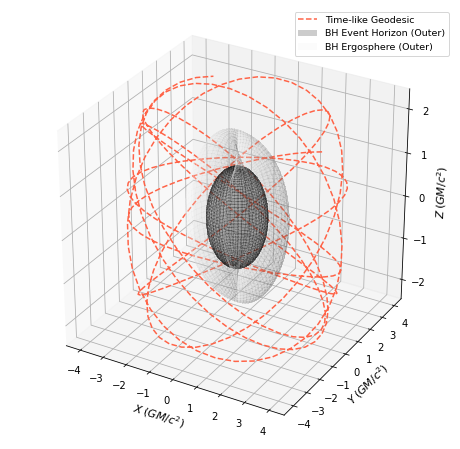

In [19]:
sgpl.plot(geod, color="tomato", figsize=(8, 8)) # figsize is in inches
sgpl.show()

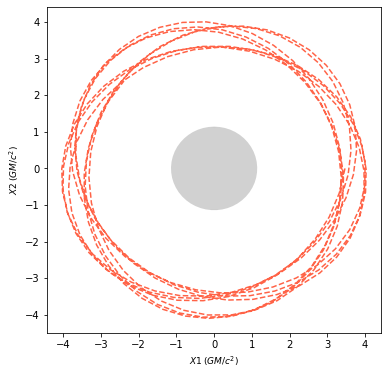

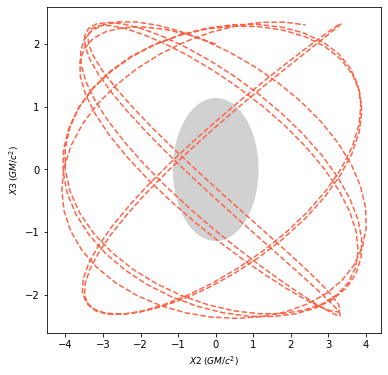

In [20]:
sgpl.plot2D(geod, coordinates=(1, 2), figsize=(6, 6), color="tomato") # X vs Y
sgpl.plot2D(geod, coordinates=(2, 3), figsize=(6, 6), color="tomato") # Y vs Z

Let us explore this plot parametrically and visualize the coordinate variations, with respect to the affine parameter.

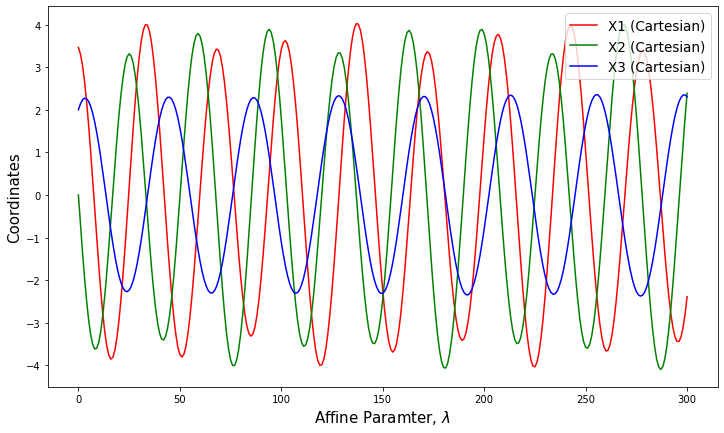

In [21]:
sgpl.parametric_plot(geod, figsize=(12, 7), colors=("red", "green", "blue"))
sgpl.show()

We can also produce high-quality animations with `animate`, as shown below.

<IPython.core.display.Javascript object>


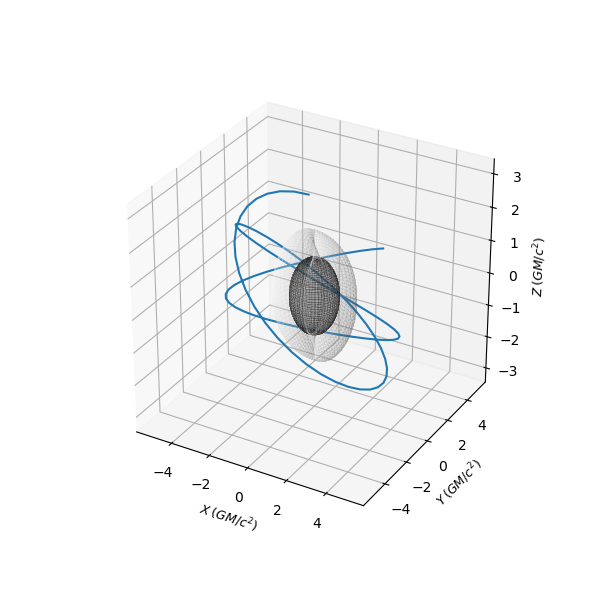

In [22]:
# Using nbagg matplotlib Jupyter back-end for Interactive Matplotlib Plots - Necessary for animations
%matplotlib nbagg
sgpl.animate(geod, interval=10, color="tomato")

In [16]:
# Saving the animation to file
sgpl.ani.save("CoolKerrGeodesic.gif", write="imagemagick", fps=60) # You should have "imagemagick" isntalled in your system

## Example 3 - Kerr Null-like Capture (Frame Dragging), using Julia Backend and InteractiveGeodesicPlotter

### Defining initial conditions

In [17]:
# Initial Conditions
position = [2.5, np.pi / 2, 0.]
momentum = [0., 0., -2.]
a = 0.99 # Extremal Kerr Black Hole
end_lambda = 150.
step_size = 0.0005 # Low step_size is required for good approximation in a strong gravity region
return_cartesian = True
julia = True # Using Julia

### Calculating Geodesic

In [18]:
geod = Nulllike(
    position=position,
    momentum=momentum,
    a=a,
    end_lambda=end_lambda,
    step_size=step_size,
    return_cartesian=return_cartesian,
    julia=julia
)

geod

e:\coding\winpython\wpy64-3740\python-3.7.4.amd64\lib\site-packages\einsteinpy_geodesics\geodesics_wrapper.py:84: RuntimeWarning:

Test particle has reached the Event Horizon. 



Geodesic Object:
            Type = (Null-like),
            Position = ([2.5, 1.5707963267948966, 0.0]),
            Momentum = ([0.0, 0.0, -2.0]),
            Spin Parameter = (0.99)
            Solver details = (
                Backend = (Julia)
                Step-size = (0.0005),
                End-Lambda = (150.0)
                Trajectory = (
                    (array([0.00000000e+00, 5.00000000e-04, 1.00000000e-03, ...,
       3.71700000e+00, 3.71749241e+00, 3.71749241e+00]), array([[ 2.50000000e+00,  0.00000000e+00,  1.53080850e-16,
         0.00000000e+00,  0.00000000e+00, -2.00000000e+00],
       [ 2.49999998e+00,  1.46505775e-04,  1.53080849e-16,
         1.52261067e-04, -1.94472683e-20, -2.00000000e+00],
       [ 2.49999993e+00,  2.93011541e-04,  1.53080847e-16,
         3.04522151e-04, -3.88945371e-20, -2.00000000e+00],
       ...,
       [-1.15166415e+00,  6.23772183e-02,  7.06224520e-17,
         6.40315667e+02, -2.53361259e-16, -2.00000000e+00],
       [-1.1011652

### Plotting using `InteractiveGeodesicPlotter`

In [19]:
igpl = InteractiveGeodesicPlotter(
    bh_colors=("black", "white"), # Colors for BH surfaces, Event Horizon & Ergosphere
    draw_ergosphere=True # Ergosphere will be drawn
)

In [20]:
igpl.plot(geod, color="indigo")
igpl.show()

In [21]:
igpl.clear()
igpl.plot2D(geod, coordinates=(1, 2), color="indigo") # X vs Y
igpl.show()

In [22]:
igpl.clear()
igpl.plot2D(geod, coordinates=(1, 3), color="indigo") # X vs Z
igpl.show()

From the second plot, we note, that the test particle never leaves the equatorial plane, which is as expected.

As before, we can plot the geodesic, parametrically:

In [23]:
igpl.clear()
igpl.parametric_plot(geod, colors=("red", "green", "blue"))
igpl.show()

We can clearly see the exact "moment" the test particle hits the singularity or the Event Horizon.